# Nama  :  Nabilah Selayanti
# NPM    :  22083010013
# Kelas  :  Machine Learning (C) 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel("Data Covid-19.xlsx")
data

,Tanggal,Aktual
0,2020-02-03 00:00:00,2
1,2020-03-03 00:00:00,0
2,2020-04-03 00:00:00,0
3,2020-05-03 00:00:00,0
4,2020-06-03 00:00:00,2
...,...,...
924,2022-12-09 00:00:00,1848
925,9/13/2022,2896
926,9/14/2022,2799
927,9/15/2022,2651


In [29]:
# Mengonversi kolom "Tanggal" ke tipe data datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')
data

,Tanggal,Aktual
0,2020-02-03,2
1,2020-03-03,0
2,2020-04-03,0
3,2020-05-03,0
4,2020-06-03,2
...,...,...
924,2022-12-09,1848
925,2022-09-13,2896
926,2022-09-14,2799
927,2022-09-15,2651


In [4]:
alpha = 0.9

data['Forecast'] = np.nan
data['Error'] = np.nan
data['Absolut Error'] = np.nan
data['Cumulative Absolut Error'] = np.nan
data['RSFE'] = np.nan
data['MAD'] = np.nan
data['Tracking Signal'] = np.nan
data['MSE'] = np.nan
data['MAPE'] = np.nan

In [5]:
n = len(data)

forecast_first_row = data['Aktual'].sum() / n

for i in range(len(data)):
    if i == 0:
        forecast = forecast_first_row
    else:
        forecast = data.at[i - 1, 'Forecast'] + alpha * (data.at[i - 1, 'Aktual'] - data.at[i - 1, 'Forecast'])
    data.at[i, 'Forecast'] = forecast
    data.at[i, 'Error'] = data.at[i, 'Aktual'] - forecast
    data.at[i, 'Absolut Error'] = abs(data.at[i, 'Error'])
    data.at[i, 'Cumulative Absolut Error'] = data['Absolut Error'][:i+1].sum()
    data.at[i, 'RSFE'] = data['Error'][:i+1].sum()
    data.at[i, 'MAD'] = data.at[i, 'Cumulative Absolut Error'] / (i + 1)
    data.at[i, 'Tracking Signal'] = data.at[i, 'RSFE'] / data.at[i, 'MAD']
    data.at[i, 'MSE'] = data.at[i, 'Error'] ** 2
    data.at[i, 'MAPE'] = data.at[i, 'Absolut Error'] / data.at[i, 'Aktual']
    
data = data.replace([np.inf, -np.inf], 0)
data

C:\Users\Selayanti\AppData\Local\Temp\ipykernel_11072\3192739172.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  data.at[i, 'MAPE'] = data.at[i, 'Absolut Error'] / data.at[i, 'Aktual']


,Tanggal,Aktual,Forecast,Error,Absolut Error,Cumulative Absolut Error,RSFE,MAD,Tracking Signal,MSE,MAPE
0,2020-02-03 00:00:00,2,6894.557589,-6892.557589,6892.557589,6892.557589,-6892.557589,6892.557589,-1.000000,4.750735e+07,3446.278794
1,2020-03-03 00:00:00,0,691.255759,-691.255759,691.255759,7583.813348,-7583.813348,3791.906674,-2.000000,4.778345e+05,0.000000
2,2020-04-03 00:00:00,0,69.125576,-69.125576,69.125576,7652.938924,-7652.938924,2550.979641,-3.000000,4.778345e+03,0.000000
3,2020-05-03 00:00:00,0,6.912558,-6.912558,6.912558,7659.851481,-7659.851481,1914.962870,-4.000000,4.778345e+01,0.000000
4,2020-06-03 00:00:00,2,0.691256,1.308744,1.308744,7661.160225,-7658.542737,1532.232045,-4.998292,1.712811e+00,0.654372
...,...,...,...,...,...,...,...,...,...,...,...
924,2022-12-09 00:00:00,1848,2008.321221,-160.321221,160.321221,978431.984230,-5589.472741,1057.764307,-5.284233,2.570289e+04,0.086754
925,9/13/2022,2896,1864.032122,1031.967878,1031.967878,979463.952108,-4557.504863,1057.736449,-4.308734,1.064958e+06,0.356342
926,9/14/2022,2799,2792.803212,6.196788,6.196788,979470.148896,-4551.308075,1056.602102,-4.307495,3.840018e+01,0.002214
927,9/15/2022,2651,2798.380321,-147.380321,147.380321,979617.529217,-4698.688396,1055.622338,-4.451107,2.172096e+04,0.055594


In [34]:
# Menghitung nilai prediksi forecast dan MAPE
last_forecast = data.at[928, 'Forecast'] + alpha * (data.at[928, 'Aktual'] - data.at[928, 'Forecast'])

total_MAPE = data.loc[1:, 'MAPE'].mean()*100

print(f'Forecast prediction for 9/17/2022: {last_forecast:.3f}')
print(f'Mean Absolut Percentage Error (MAPE) : {total_MAPE:.3f}%')

Forecast prediction for 9/17/2022: 2388.774
Mean Absolut Percentage Error (MAPE) : 17.589%


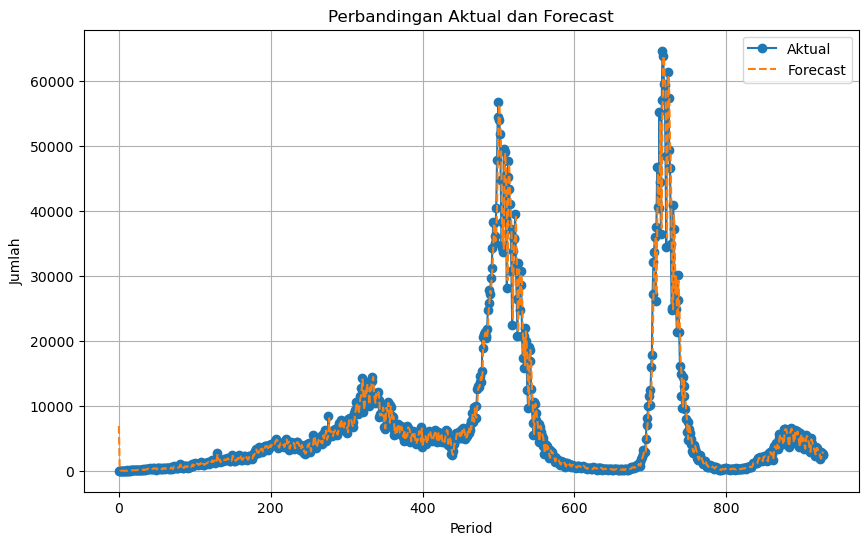

In [36]:
# Plot untuk perbandingan antara Aktual dan Forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Aktual'], label='Aktual', marker='o')
plt.plot(data.index, data['Forecast'], label='Forecast', linestyle='--')
plt.title('Perbandingan Aktual dan Forecast')
plt.xlabel('Period')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
mean_data = np.mean(data['Tracking Signal'])
std_data = np.std(data['Tracking Signal'])

k = 3  
UCL = mean_data + k * std_data
LCL = mean_data - k * std_data

print(f'Upper Control Limit (UCL): {UCL:.2f}')
print(f'Lower Control Limit (LCL): {LCL:.2f}')

Upper Control Limit (UCL): 59.62
Lower Control Limit (LCL): -70.35


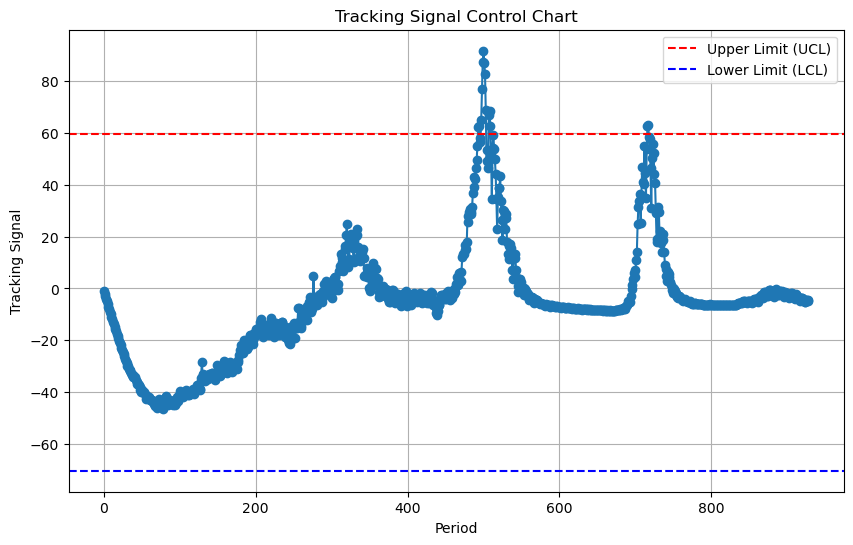

In [11]:
# Membuat grafik peta kontrol Tracking Signal
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Tracking Signal'], marker='o', linestyle='-')
plt.axhline(y=59.62, color='r', linestyle='--', label='Upper Limit (UCL)')
plt.axhline(y=-70.35, color='b', linestyle='--', label='Lower Limit (LCL)')
plt.title('Tracking Signal Control Chart')
plt.xlabel('Period')
plt.ylabel('Tracking Signal')
plt.legend()
plt.grid(True)